<a href="https://colab.research.google.com/github/amanmathur19/image-classification/blob/master/catergory_classification_small.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

In [90]:
train = pd.read_csv('/content/drive/Shared drives/New Markets/Aman/Project Neo/small.csv')

In [91]:
train.head()

,Unnamed: 0,category,image_filename
0,0,Jackets & Blazers,5e0e9bce21cd0a98fdab0266.jpg
1,1,Shoes,5dec1ed62f82761b635fc1d6.jpg
2,2,Dresses & Skirts,5e0eb8c72cc51560a35b1a30.jpg
3,3,Shoes,5e0e58d61528128fd2cdc194.jpg
4,4,Dresses & Skirts,5dfbcbe1ffc2d4254efda41e.jpg


In [92]:
train = train.drop(train.columns[0] , axis = 1)

In [93]:
train['category'] = train['category'].apply(lambda x: x.replace(" ",""))
train.head()

,category,image_filename
0,Jackets&Blazers,5e0e9bce21cd0a98fdab0266.jpg
1,Shoes,5dec1ed62f82761b635fc1d6.jpg
2,Dresses&Skirts,5e0eb8c72cc51560a35b1a30.jpg
3,Shoes,5e0e58d61528128fd2cdc194.jpg
4,Dresses&Skirts,5dfbcbe1ffc2d4254efda41e.jpg


In [94]:
d = dict(zip(train['category'].unique(), range(0,4)))
d
train['category'] =  train['category'].map(d,na_action = 'ignore')

train.drop(train.columns[0], axis=1)
train.head()

,category,image_filename
0,0,5e0e9bce21cd0a98fdab0266.jpg
1,1,5dec1ed62f82761b635fc1d6.jpg
2,2,5e0eb8c72cc51560a35b1a30.jpg
3,1,5e0e58d61528128fd2cdc194.jpg
4,2,5dfbcbe1ffc2d4254efda41e.jpg


In [95]:
d

{'Dresses&Skirts': 2, 'Handbags': 3, 'Jackets&Blazers': 0, 'Shoes': 1}

In [143]:
# We have grayscale images, so while loading the images we will keep grayscale=True, if you have RGB images, you should set grayscale as False
train_image = []
for i in tqdm(range(train.shape[0])):
    try:
      img = image.load_img('/content/drive/Shared drives/New Markets/Aman/Project Neo/image_data/'+train['image_filename'][i], target_size=(56,56,3), grayscale=False)
    except Exception as e:
      print(e)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)



 25%|██▌       | 25/100 [00:00<00:00, 120.90it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image_data/5e0e58d2180efde8a9658bab.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image_data/5e0980bfb146ccb77e9f6329.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image_data/5e080fbce974fbf1adcf61b9.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image_data/e0cc16ed1aa25aa7d96415c.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image_data/5e0e9e2ba20dfc2cf79768d4.jpg'


 57%|█████▋    | 57/100 [00:00<00:00, 106.97it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image_data/5e0e5f98afade8ff56fd3b09.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image_data/5e0e9ddd21cd0aa61fab0f4e.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image_data/5e0e5fd05967046a8930181a.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image_data/5e0e60ac969d1fb71e494d0e.jpg'


 81%|████████  | 81/100 [00:00<00:00, 111.57it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image_data/5e0e611921cd0ae5f3a9bfd7.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image_data/5e0dd0fcb3e917b47fd55934.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image_data/5e0dd2b8138e18aa4cbd33a4.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image_data/5e0ec17c93b46a8e2970fad2.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image_data/5e0dde3b264a5594d6233eed.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image_data/5e0e63fa10f00ffaf0b33a0c.jpg'


100%|██████████| 100/100 [00:00<00:00, 113.65it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image_data/5e0de4a7969d1f0c4e474f58.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image_data/5e0ea4c09d3b788e8085c38a.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image_data/e0de098d948a11ec6752e34.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image_data/5e0ec2978557af7d9189e193.jpg'


In [144]:
y=train['category'].values
y = to_categorical(y)

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


In [102]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(56,56,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])


In [196]:
nets = 3
model = [0] *nets

for j in range(3):
    model[j] = Sequential()
    model[j].add(Conv2D(24,kernel_size=5,padding='same',activation='relu',
            input_shape=(56,56,3)))
    model[j].add(MaxPooling2D())
    if j>0:
        model[j].add(Conv2D(48,kernel_size=5,padding='same',activation='relu'))
        model[j].add(MaxPooling2D())
    if j>1:
        model[j].add(Conv2D(64,kernel_size=5,padding='same',activation='relu'))
        model[j].add(MaxPooling2D(padding='same'))
    model[j].add(Flatten())
    model[j].add(Dense(256, activation='relu'))
    model[j].add(Dense(4, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [188]:
nets = 6
model = [0] *nets
for j in range(6):
    model[j] = Sequential()
    model[j].add(Conv2D(j*8+8,kernel_size=5,activation='relu',input_shape=(56,56,3)))
    model[j].add(MaxPooling2D())
    model[j].add(Conv2D(j*16+16,kernel_size=5,activation='relu'))
    model[j].add(MaxPooling2D())
    model[j].add(Flatten())
    model[j].add(Dense(256, activation='relu'))
    model[j].add(Dense(4, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [189]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(80, 56, 56, 3)
(80, 4)
(20, 56, 56, 3)
(20, 4)


In [199]:
model[2].fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
3/3 [==============================] - 1s 231ms/step - loss: 1.4506 - accuracy: 0.2375 - val_loss: 1.3949 - val_accuracy: 0.1000
Epoch 2/10
3/3 [==============================] - 1s 181ms/step - loss: 1.3688 - accuracy: 0.3125 - val_loss: 1.3797 - val_accuracy: 0.1000
Epoch 3/10
3/3 [==============================] - 1s 185ms/step - loss: 1.3579 - accuracy: 0.3125 - val_loss: 1.3920 - val_accuracy: 0.1000
Epoch 4/10
3/3 [==============================] - 1s 181ms/step - loss: 1.3322 - accuracy: 0.3375 - val_loss: 1.3576 - val_accuracy: 0.3000
Epoch 5/10
3/3 [==============================] - 1s 180ms/step - loss: 1.3123 - accuracy: 0.4000 - val_loss: 1.3767 - val_accuracy: 0.2500
Epoch 6/10
3/3 [==============================] - 1s 181ms/step - loss: 1.2912 - accuracy: 0.4375 - val_loss: 1.3392 - val_accuracy: 0.3000
Epoch 7/10
3/3 [==============================] - 1s 184ms/step - loss: 1.2117 - accuracy: 0.5250 - val_loss: 1.3084 - val_accuracy: 0.3000
Epoch 8/10
3/3 [====

In [173]:
test_image = []
img = image.load_img('/content/drive/Shared drives/New Markets/Aman/Project Neo/temp_2.jpg',target_size=(56,56,3), grayscale=False)
img = image.img_to_array(img)
img = img/255
test_image.append(img)
test = np.array(test_image)



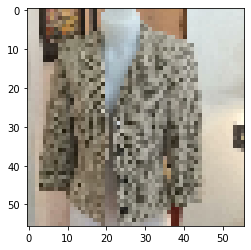

In [174]:
plt.imshow(img)

In [181]:
prediction = model[2].predict_classes(test)

In [182]:
prediction

array([1])

In [183]:
d

{'Dresses&Skirts': 2, 'Handbags': 3, 'Jackets&Blazers': 0, 'Shoes': 1}